In [5]:
import pandas as pd

In [7]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
excel_path = '/Users/ganzorig/Library/CloudStorage/OneDrive-UAEUniversity/UAEU/ArSL/Phase_II/AUTSL dataset statistics.xlsx'

In [29]:
df = pd.read_excel(excel_path,'Sheet1')


In [23]:
chosen_list = []
class_list ={}
class_list['1 hand and 1 gesture']=[]
class_list['1 hand and 2 gestures']=[]
class_list['2 hands and 1 gesture']=[]
class_list['2 hands and 2 gestures']=[]

for ind in df.index:
    if isinstance(df['class_name'][ind], str):
        if df['2 hands and 2 gestures'][ind]:
            class_list['2 hands and 2 gestures'].append(df['class_name'][ind])
        if df['2 hands and 1 gesture'][ind]:
            class_list['2 hands and 1 gesture'].append(df['class_name'][ind])
        if df['1 hand and 2 gestures'][ind]:
            class_list['1 hand and 2 gestures'].append(df['class_name'][ind])
        if df['1 hand and 1 gesture'][ind]:
            class_list['1 hand and 1 gesture'].append(df['class_name'][ind])

        #print(df['class_name'][ind], df['2 hands and 2 gestures'][ind])


In [28]:
for i in class_list:
    print('------'+i+'-------')

    #for element in class_list[i]:
    #    print(element)
    print(class_list[i])

------1 hand and 1 gesture-------
['absent', 'allright', 'alone', 'ataturk', 'bad', 'bring', 'child', 'comb', 'cry', 'difficult', 'drink', 'eat', 'enemy', 'escape', 'existing', 'fasting', 'father', 'fault', 'female', 'full', 'gift', 'glass', 'good', 'goodbye', 'government', 'grandfather', 'grandmother', 'guest', 'hat', 'how', 'hungry', 'I', 'if_only', 'ill', 'labor', 'laugh', 'light', 'love', 'male', 'manager', 'meal', 'medicine', 'memorize', 'milk', 'money', 'near', 'never', 'no', 'past', 'promise', 'psychology', 'push', 'radiator', 'retired', 'right', 'road', 'same', 'say', 'school', 'scissors', 'see', 'smell', 'soup', 'sugar', 'sweet', 'tap', 'teacher', 'telephone', 'they', 'thursday', 'toilet', 'tongs', 'turkey', 'unwise', 'voice', 'wait', 'wednesday', 'who', 'wise', 'wrong', 'yes', 'yesterday', 'you']
------1 hand and 2 gestures-------
['brother', 'enjoy_your_meal', 'feast', 'friday', 'hi', 'inform', 'look', 'mirror', 'monday', 'mother', 'napkin', 'needle', 'nope', 'pencil', 'pota

In [5]:
sampled_classes = []

with open('autsl100_classes.txt','r') as w:
    data = w.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
sampled_classes = data.split("\n")

In [ ]:
sampled_classes

In [34]:
import os
import random
import shutil

data_path = '/Users/ganzorig/Library/CloudStorage/OneDrive-UAEUniversity/UAEU/Dataset/chalearn_processed_full'
dest_path = '/Users/ganzorig/Library/CloudStorage/OneDrive-UAEUniversity/UAEU/Dataset/AUTSL100'
big_signer_count = []
for split in ['train','test','val']:
    for clas in sampled_classes:
        os.makedirs(os.path.join(dest_path,'color',split,clas),exist_ok=True)
        os.makedirs(os.path.join(dest_path,'depth',split,clas),exist_ok=True)

        videos = os.listdir(os.path.join(data_path,'color',split,clas))
        signers = {}
        for video in videos:
            signer = video.split('_')[0]
            if signer not in signers:
                signers[signer]=[]
            signers[signer].append(video)
        signer_list = list(signers.keys())
        if split=='train':
            
            signer_list = random.sample(signer_list,10)
        for signer in signer_list:
            if split =='train':
                big_signer_count.append(signer)
            if split =='train':
                videos = [random.choice(signers[signer])]
            else:
                    videos = signers[signer]
            for video in videos:
                #pass
                
                shutil.copy(os.path.join(data_path,'color',split,clas,video),os.path.join(dest_path,'color',split,clas,video))
                shutil.copy(os.path.join(data_path,'depth',split,clas,video.replace('color','depth')),os.path.join(dest_path,'depth',split,clas,video.replace('color','depth')))        

In [31]:
len(set(big_signer_count))

31

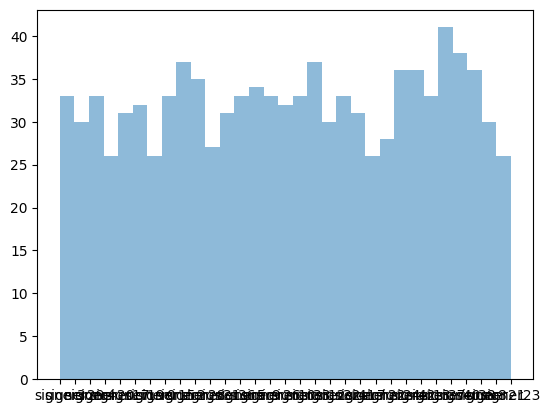

In [35]:
import matplotlib.pyplot as plt
plt.hist(big_signer_count,bins = len(set(big_signer_count)),alpha =0.5)
plt.show()

In [10]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/1d/57/888776de79e1c2e787368ecbe63e3e57dbec984a5c83220e44c15fefe226/matplotlib-3.7.2-cp39-cp39-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/44/b4/2bcb2f8afcb7a4652af0fbfa47d5f01ae599c4b35af6f89c1f33c9c56fa3/contourpy-1.1.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/a3/0c/6282d8f58c49ebb1909fa13b27a4935a97d1025284044ebf06d4b84a9d21/fonttools-4.42.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 4.2 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/ef/da/e887802f34afb5806f139c71e6d5f20a9f33b2fccd7f9de771094f66ca5e/kiwisolver-1.4.5-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dep